Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**Hands-on Activity 6.2** | Training Neural Networks
**Name** | Abad, Julia Marie Iberet
**Section** | CPE32S3
**Date Performed**: | March 27, 2024
**Date Submitted**: | April 2, 2024
**Instructor**: | Engr. Roman Richard



# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [2]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [4]:
filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [5]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
672,10,68,106,23,49,35.5,0.285,47,0
148,5,147,78,0,0,33.7,0.218,65,0
401,6,137,61,0,0,24.2,0.151,55,0
457,5,86,68,28,71,30.2,0.364,24,0
99,1,122,90,51,220,49.7,0.325,31,1


In [6]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [7]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [9]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [10]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [11]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [13]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 25ms/step - loss: 0.7135 - accuracy: 0.5833 - val_loss: 0.6887 - val_accuracy: 0.5677
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6899 - accuracy: 0.6042 - val_loss: 0.6702 - val_accuracy: 0.5990
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6705 - accuracy: 0.6215 - val_loss: 0.6552 - val_accuracy: 0.6042
Epoch 4/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6545 - accuracy: 0.6302 - val_loss: 0.6427 - val_accuracy: 0.5990
Epoch 5/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6409 - accuracy: 0.6389 - val_loss: 0.6322 - val_accuracy: 0.6198
Epoch 6/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6295 - accuracy: 0.6476 - val_loss: 0.6233 - val_accuracy: 0.6250
Epoch 7/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6197 - accuracy: 0.6545 - val_loss: 0.6155 - val_accuracy: 0.6458
Epoch 8/200


In [38]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1  = model.predict(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 5ms/step


In [39]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0.5899968 ],
       [0.59497625],
       [0.2839389 ],
       [0.2449466 ],
       [0.18373224],
       [0.5573158 ],
       [0.01957704],
       [0.3452066 ],
       [0.9296316 ],
       [0.11585666]], dtype=float32)

In [40]:
y_pred_prob_nn_1[:10]

array([[0.5899968 ],
       [0.59497625],
       [0.2839389 ],
       [0.2449466 ],
       [0.18373224],
       [0.5573158 ],
       [0.01957704],
       [0.3452066 ],
       [0.9296316 ],
       [0.11585666]], dtype=float32)

Create the plot_roc function

In [41]:
Rf = RandomForestClassifier(n_estimators=200)
Rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [42]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

accuracy is 0.776
roc-auc is 0.833


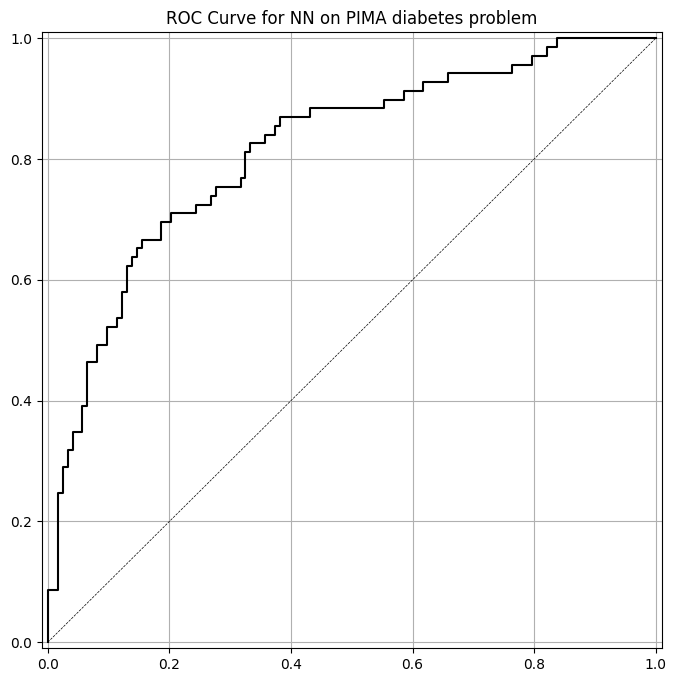

In [43]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,Rf.predict(X_test))))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,Rf.predict_proba(X_test)[:,1])))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [44]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

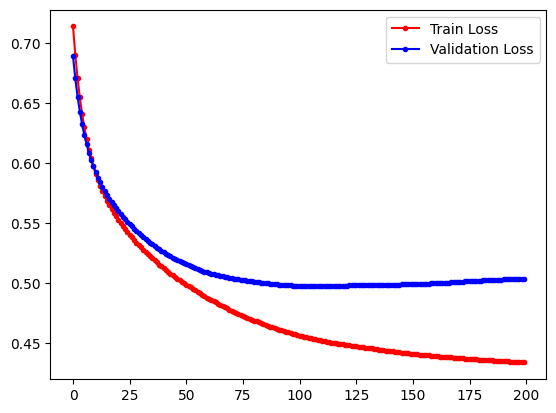

In [45]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss? <br>
Based on the result, the model is learning and improving initially but eventually reaches a point where additional training epochs don't lead to significant improvements on the validation set. In that case, we can say that the data is underfitting because the train loss and the validation loss fails to reach and match each other.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [46]:
#Build a model with two hidden layers, each with 6 nodes:
#Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
model_1 = Sequential([
    Dense(6, input_shape = (8,), activation = "sigmoid"),
    Dense(2, activation = "relu")
])

In [48]:
#Use a learning rate of .003 and train for 1500 epochs
model_1.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics = ["accuracy"])
run_his_1 = model_1.fit(X_train_norm, y_train, validation_data = (X_test_norm, y_test), epochs = 1500)

Epoch 1/1500
18/18 [==============================] - 1s 29ms/step - loss: 1.5499 - accuracy: 0.3837 - val_loss: 1.3831 - val_accuracy: 0.3854
Epoch 2/1500
18/18 [==============================] - 0s 6ms/step - loss: 1.3605 - accuracy: 0.4149 - val_loss: 1.2652 - val_accuracy: 0.3750
Epoch 3/1500
18/18 [==============================] - 0s 7ms/step - loss: 3.3237 - accuracy: 0.4306 - val_loss: 1.3000 - val_accuracy: 0.5573
Epoch 4/1500
18/18 [==============================] - 0s 6ms/step - loss: 1.4127 - accuracy: 0.5556 - val_loss: 1.2868 - val_accuracy: 0.5521
Epoch 5/1500
18/18 [==============================] - 0s 6ms/step - loss: 1.4191 - accuracy: 0.5521 - val_loss: 1.3776 - val_accuracy: 0.5677
Epoch 6/1500
18/18 [==============================] - 0s 6ms/step - loss: 1.3940 - accuracy: 0.5590 - val_loss: 1.2832 - val_accuracy: 0.5677
Epoch 7/1500
18/18 [==============================] - 0s 5ms/step - loss: 1.3866 - accuracy: 0.5677 - val_loss: 1.3368 - val_accuracy: 0.5677
Epoch

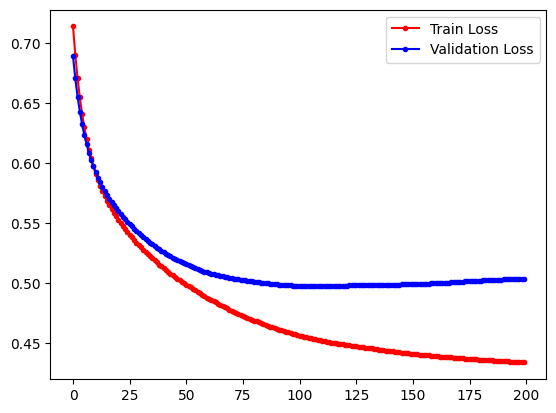

In [52]:
#Graph the trajectory of the loss functions, accuracy on both train and test set
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

accuracy is 0.776
roc-auc is 0.833


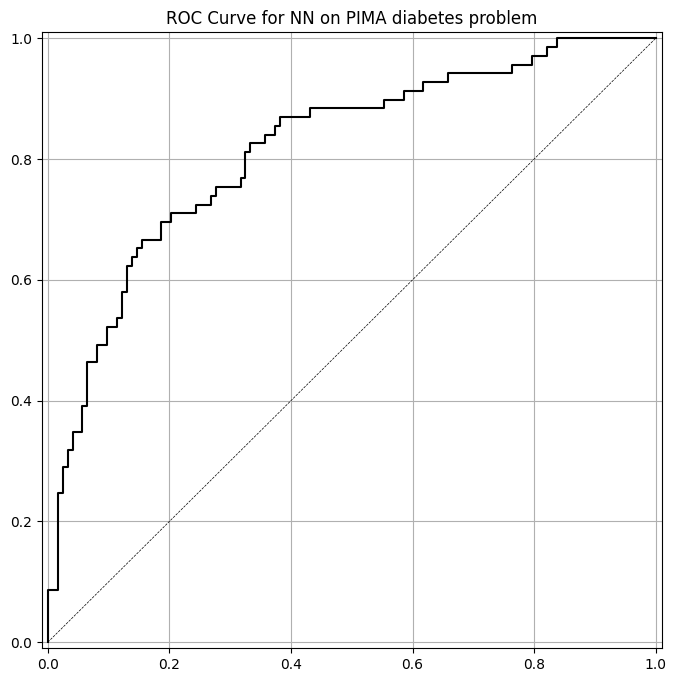

In [55]:
#Plot the roc curve for the predictions
print('accuracy is {:.3f}'.format(accuracy_score(y_test,Rf.predict(X_test))))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,Rf.predict_proba(X_test)[:,1])))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

In [90]:
#Use different learning rates, numbers of epochs, and network structures.
model_2 = Sequential([
    Dense(5, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [80]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 5)                 45        
                                                                 
 dense_17 (Dense)            (None, 10)                60        
                                                                 
Total params: 105 (420.00 Byte)
Trainable params: 105 (420.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
model_2.compile(SGD(learning_rate=0.001), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
18/18 [==============================] - 2s 26ms/step - loss: 0.9197 - accuracy: 0.4028 - val_loss: 0.9939 - val_accuracy: 0.3854
Epoch 2/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.9157 - accuracy: 0.4028 - val_loss: 0.9892 - val_accuracy: 0.3854
Epoch 3/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.9116 - accuracy: 0.4028 - val_loss: 0.9845 - val_accuracy: 0.3854
Epoch 4/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.9076 - accuracy: 0.4028 - val_loss: 0.9800 - val_accuracy: 0.3854
Epoch 5/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.9037 - accuracy: 0.4062 - val_loss: 0.9755 - val_accuracy: 0.3802
Epoch 6/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.8998 - accuracy: 0.4097 - val_loss: 0.9711 - val_accuracy: 0.3854
Epoch 7/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.8961 - accuracy: 0.4115 - val_loss: 0.9667 - val_accuracy: 0.3854
Epoc

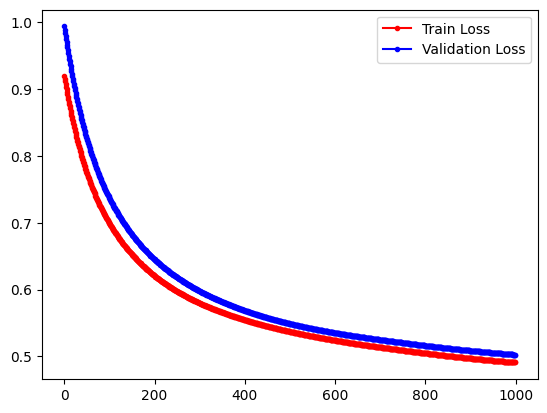

In [92]:
#Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
#Graph the trajectory of the loss functions, accuracy on both train and test set

fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Interpret your result <br>

The plot of the result is clean and shows a decreasing trend of both train and validation loss which means the model was learning from the training data and improving its predictive capability. However, I noticed that the validation loss slightly fluctuated around the later epochs which suggests a possible overfitting.

#### Conclusion

In this activity, we explored the training and evaluation of neural network models using different configurations. By varying the learning rates, number of epochs, and network structures, we learned how these factors impact how well the model learns and makes predictions. The graphs showing the training and validation losses helped us see when the model is getting better at learning from the data and when it might be struggling or overfitting. Overall, this activity taught us more about how neural networks work and why it's important to choose the right settings for them to work well.